(visualization:matplotlib:seaborn)=
# Seaborn

Seaborn is a Python library based on Matplotlib. It provides two useful features:

* different pre-defined styles for Matplotlib figures,
* lots of functions for visualizing complex datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The reason for importing as `sns` is somewhat vague. `sns` are the initials of [Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), a fictional television character. See also [issue #229 in Seaborns Github repository](https://github.com/mwaskom/seaborn/issues/229).

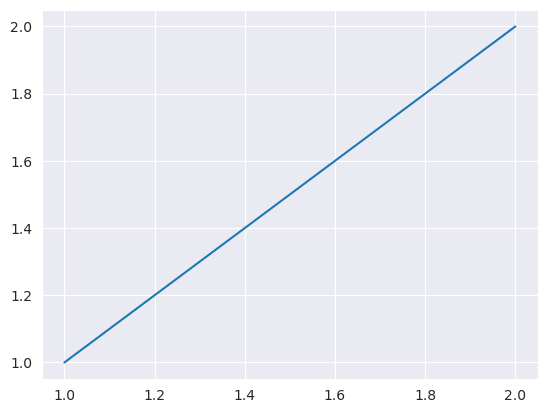

In [2]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
x = [1, 2]
y = [1, 2]
ax.plot(x, y)
plt.show()

Seaborn also supports different scalings for different usecases. Scaling is set with `sns.set_context` and one of the string arguments `paper`, `notebook`, `talk`, `poster`, where `notebook` is the default. Different scalings allow for almost identical code to create figures for different channels of publication.

In [3]:
sns.set_context('talk')
fig, ax = plt.subplots()
x = [1, 2]
y = [1, 2]
ax.plot(x, y)
plt.show()

## Plots for Exploring Data Sets

Seaborn comes with lots of functions which take a whole data set (Pandas data frame) and create complex visualizations of the dataset. To get an overview have a look at the [official Seaborn tutorials](https://seaborn.pydata.org/tutorial.html) and at the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html).

In [4]:
sns.set_context('notebook')
rng = np.random.default_rng(0)

# parameters for point clouds
means = [[5, 0, 0], [-5, 2, 0], [0, -3, 5]] # mean vectors
covs = [[[1, 1, 0], [1, 1, 0], [0, 0, 1]],
        [[10, 2, 0], [2, 10, 2], [0, 2, 10]],
        [[0.1, 0, 0], [0, 3, 3], [0, 3, 7]]] # covariance matrices
names = ['cloud A', 'cloud B', 'cloud C'] # names
ns = [100, 1000, 100] # samples per cloud

# create data frame with named samples from each cloud
clouds = []
for (mean, cov, name, n) in zip(means, covs, names, ns):
    x, y, z = rng.multivariate_normal(mean, cov, n).T
    cloud_data = pd.DataFrame(np.asarray([x, y, z]).T, columns=['x', 'y', 'z'])
    cloud_data['name'] = name
    clouds.append(cloud_data)
data = pd.concat(clouds)

# show data frame structure    
display(data)

# plot pairwise relations with Seaborn
sns.pairplot(data, hue='name', hue_order=['cloud B', 'cloud A', 'cloud C'])
plt.show()

x         y         z     name
0   4.874270 -0.125730 -0.132105  cloud A
1   4.895100 -0.104900 -0.535669  cloud A
2   3.696000 -1.304000  0.947081  cloud A
3   6.265421  1.265421 -0.623274  cloud A
4   7.325031  2.325031 -0.218792  cloud A
..       ...       ...       ...      ...
95  0.044085 -4.658415  6.014424  cloud C
96  0.133556  0.038378  9.619508  cloud C
97  0.401736 -4.324301  3.687626  cloud C
98 -0.202251 -1.378106  3.291303  cloud C
99  0.110040 -2.580220  4.072073  cloud C

[1200 rows x 4 columns]